### Оглавление

1. [Чтение файла](#open_files)


2. [Предобработка данных](#preprocessing)

      2.1 [Названия переменных](#names)
    
      2.2 [Проверка на дубликаты](#duplicates)
      
      2.3 [Описательные статистики](#descriptive_stats)
      

3. [Маркетинговый анализ](#marketing_analysis)

      3.1 [Click-through rate](#ctr)
      
      3.2 [Conversion rate](#cr)
      
      3.2.1 [Конверсия в скачивания](#cr_ist)
   
      3.2.2 [Конверсия в регистрацию](#cr_reg)
            
      3.2.3 [Конверсия в платящих пользователей](#cr_pay)
      
      3.3 [Return on Investments](#roi)
      
      3.4 [Customer Acquisition Cost](#cac)
      
      3.5 [Lifetime Value](#ltv)
      
      3.6 [Cost per Install](#cpi)
      
      
4. [Общий вывод](#conclusion)

# Анализ маркетинговых метрик приложения знакомств

**Входные данные**: доступны данные по работе рекламных кампаний, запущенных пятью медиабайерами для привлечения пользователей в наше приложение. 

**Структура файла:**

* `Campaign_id` - ID кампании;

* `Geo` - геопозиция, на которую настроена рекламная кампания;

* `Buyer` - байер, выполнивший запуск;

* `Impressions` - количество показов рекламных объявлений;

* `Clicks` - количество кликов; 

* `Installs` - количество установок;

* `Registrations` - количество регистраций;

* `Spend` - Затраченная сумма;

* `Revenue_ad (1d/7d/30d)` - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни;

* `Revenue_in_app (1d/7d/30d)` - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни;

* `Payers (1d/7d/30d)` - Количество покупателей в приложении на 1/7/30 день их жизни.


**Цель**: исследовать данные и получить из них выводы, которые могут быть полезны для дальнейшей работы медиабайеров. 

In [5]:
# Установка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

<a id="open_files"></a>

## Чтение файла

In [4]:
# Загрузка файла
data = pd.read_csv("C:/Users/marus/Downloads/test_data.csv", 
                   index_col=0,
                   decimal=",")

In [7]:
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Вывод первых 10 строк датасета
data.head(10)

Geo    Buyer  Impressions  Clicks  Installs  \
Campaign_id                                                           
1             north america  buyer_1      3456974  129508     33054   
2             north america  buyer_2       245542    6306      3401   
3             north america  buyer_1      1281103   35724     13315   
4             north america  buyer_1       215538    9987      3119   
5            western europe  buyer_2       335878    7343      3952   
6             north america  buyer_2        79419    2124      1110   
7             north america  buyer_3        88809    3113       926   
8             north america  buyer_3       113917    3966      1249   
9             north america  buyer_2        65516    1717       905   
10            north america  buyer_2        64739    1899       928   

             Registrations        Spend  Revenue_ad1d  Revenue_in_app1d  \
Campaign_id                                                               
1                    21932  3208.440002   1163.521408        162.220001   
2                     2448  1569.519999    833.059639         37.250000   
3                     8101  1231.999998    459.682600          3.260000   
4                     1857  1228.129999    602.778160         26.130000   
5                     2955   872.570005    427.807238         19.030001   
6                      745   556.720001    237.204412          9.770000   
7                      603   525.510010    252.857545         15.370000   
8                      854   521.509998    306.853212         30.780000   
9                      685   460.330000    186.115059         25.129999   
10                     539   416.130001    177.430283          0.000000   

             Payers1d  Revenue_ad7d  Revenue_in_app7d  Payers7d  \
Campaign_id                                                       
1                  64   1381.310062        199.749999        79   
2                  17   1200.964697         69.340001        19   
3                   4    524.987826         24.700000         6   
4                  11    830.113889         33.439999        12   
5                   4    577.039081         20.640001         5   
6                   3    315.078178         26.550001         4   
7                   3    361.393394         32.160001         3   
8                   2    484.534634         39.170000         3   
9                   6    274.565038         29.999999         9   
10                  0    240.487613          0.000000         0   

             Revenue_ad30d  Revenue_in_app30d  Payers30d  
Campaign_id                                               
1              1527.013835         276.629998         83  
2              1449.001828         120.250001         22  
3               572.633765          24.700000          6  
4              1042.831595          57.530002         12  
5               714.554179          32.150001          6  
6               389.363610          26.550001          4  
7               433.872080          32.160001          3  
8               770.979189          47.560000          4  
9               352.509658          60.350000         10  
10              268.501080           0.000000          0

In [4]:
# Общая информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 1 to 87
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo                87 non-null     object 
 1   Buyer              87 non-null     object 
 2   Impressions        87 non-null     int64  
 3   Clicks             87 non-null     int64  
 4   Installs           87 non-null     int64  
 5   Registrations      87 non-null     int64  
 6   Spend              87 non-null     float64
 7   Revenue_ad1d       87 non-null     float64
 8   Revenue_in_app1d   87 non-null     float64
 9   Payers1d           87 non-null     int64  
 10  Revenue_ad7d       87 non-null     float64
 11  Revenue_in_app7d   87 non-null     float64
 12  Payers7d           87 non-null     int64  
 13  Revenue_ad30d      87 non-null     float64
 14  Revenue_in_app30d  87 non-null     float64
 15  Payers30d          87 non-null     int64  
dtypes: float64(7), int64(7), obj

**Первые выводы по данным:**

- Датасет хранит информацию о 88 рекламных кампаниях и содержит 16 столбцов.

- Все столбцы имеют верные типы данных, изменения не требуются.

- Названия можно привести к единому регистру.

- Пропущенных значений в данных нет.

- Необходимо проверить уникальные значения в столбцах `Geo` и `Buyer` на предмет дубликатов и на соответствие легенде.

- Числовые переменные необходимо проверить на наличие пропусков.

<a id="preprocessing"></a>

## 2. Предобработка данных

<a id="names"></a>

### 2.1 Названия переменных

In [5]:
# Изменение регистра названий столбцов
data.columns = data.columns.str.lower()

# Проверка изменений регистра столбцов
data.columns

Index(['geo', 'buyer', 'impressions', 'clicks', 'installs', 'registrations',
       'spend', 'revenue_ad1d', 'revenue_in_app1d', 'payers1d', 'revenue_ad7d',
       'revenue_in_app7d', 'payers7d', 'revenue_ad30d', 'revenue_in_app30d',
       'payers30d'],
      dtype='object')

Все названия столбцом были приведены к lower case.

<a id="duplicates"></a>

### 2.2 Проверка на дубликаты

In [6]:
# Подсчет полностью идентичных строк 
data.duplicated().sum()

0

Явных дубликатов в данных нет.

Проверим столбцы `geo` и `buyer` на наличие неявных дубликатов из-за ошибок в записи и на соответствие легенде.

In [7]:
print(data['geo'].unique())
print(data['buyer'].unique())

['north america' 'western europe' 'cis' 'north africa' 'latin america'
 'tropical africa' 'australia oceania']
['buyer_1' 'buyer_2' 'buyer_3' 'buyer_4' 'buyer_5']


Оба столбца содержат корректные и не повторяющиеся категории.

<a id="descriptive_stats"></a>

### 2.3 Описательные статистики

Проверим основные описательные статистики количественных переменных на наличие аномалий.

In [8]:
# Вывод описательных статистик для количественных столбцов
data.describe()

impressions         clicks      installs  registrations        spend  \
count  8.700000e+01      87.000000     87.000000      87.000000    87.000000   
mean   1.140572e+05    3804.494253   1211.850575     769.057471   208.878506   
std    3.989255e+05   14610.898115   3883.087208    2577.564690   424.243533   
min    2.185000e+03      53.000000     10.000000       2.000000    20.410000   
25%    1.057700e+04     276.500000    107.500000      44.500000    27.680000   
50%    2.619300e+04     724.000000    258.000000     147.000000    73.160000   
75%    7.088950e+04    2063.500000    763.500000     501.500000   191.175001   
max    3.456974e+06  129508.000000  33054.000000   21932.000000  3208.440002   

       revenue_ad1d  revenue_in_app1d   payers1d  revenue_ad7d  \
count     87.000000         87.000000  87.000000     87.000000   
mean      87.254561          5.661724   2.034483    118.064320   
std      177.725195         18.486891   7.169782    231.951690   
min        0.368663          0.000000   0.000000      0.368663   
25%        8.955156          0.000000   0.000000     11.860136   
50%       19.178195          0.000000   0.000000     23.723141   
75%       91.550522          3.830000   2.000000    123.990452   
max     1163.521408        162.220001  64.000000   1381.310062   

       revenue_in_app7d   payers7d  revenue_ad30d  revenue_in_app30d  \
count         87.000000  87.000000      87.000000          87.000000   
mean           7.762644   2.551724     145.332370          11.093563   
std           23.609511   8.798465     278.149274          33.554932   
min            0.000000   0.000000       0.368663           0.000000   
25%            0.000000   0.000000      12.753347           0.000000   
50%            0.000000   0.000000      30.783903           0.550000   
75%            6.015000   2.000000     145.034273           8.600000   
max          199.749999  79.000000    1527.013835         276.629998   

       payers30d  
count  87.000000  
mean    2.816092  
std     9.299323  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     3.000000  
max    83.000000

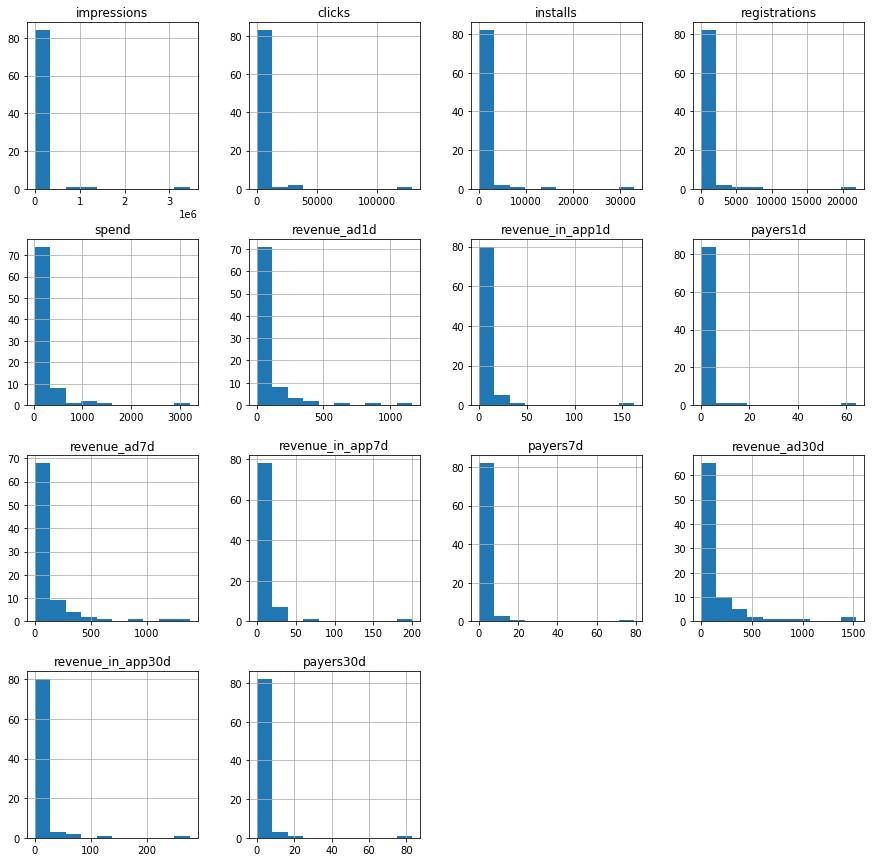

In [9]:
# Гистограммы для количественных столбцов
data.hist(figsize=(15, 15));

**Выводы по описательным статистикам:**

- Большинство количественных переменных распределено со скошенностью в сторону низких значений. 
- Практически в каждом столбце присутствует небольшое количество сверх-высоких значений (аномалии либо очень успешные рекламные кампании).

**Итоги по предобработке данных:**

1) Названия столбцов были приведены к нижнему регистру для более удобной дальнейшей работы.

2) Датасет был проверен на наличие явных и неявных дубликатов. Дубликатов не было выявлено, в данных действительно содежится информация о пяти медиабайерах.

3) Количественные переменные распределены ненормально и неравномерно, со скошенностью вправо, что может говорить о выбросах в данных.

<a id="marketing_analysis"></a>


## Маркетинговый анализ

<a id="ctr"></a>

### 3.1 Click-through rate

Оценим метрику **показатель кликабельности** (CTR) — показатель того, как часто пользователи, увидев объявление, кликают на него. Это важный показатель для понимания эффективности рекламы. Формула CTR:

```
CTR = (Clicks / Impressions) * 100
```

Сначала оценим метрику для каждой отдельной кампании, а затем посмотрим на общую картину в разрезе медиабайеров и геолокаций.

In [10]:
# Click-through rate для каждой кампании
data['ctr_%'] = round(data['clicks'] / data['impressions'] * 100, 2)

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='ctr_%', ascending=False).head()[['ctr_%']]

ctr_%
Campaign_id       
24            7.94
53            6.46
47            5.64
45            5.43
79            5.12

In [11]:
# Click-through rate с разбивкой по гео и медиабайерам
ctr = data.groupby(['geo', 'buyer'])[['clicks', 'impressions']].apply(sum)
ctr['ctr, %'] = round(ctr['clicks'] / ctr['impressions'] * 100, 2)
ctr = ctr.drop(['clicks', 'impressions'], axis=1)

# Вывод таблицы на экран
ctr

ctr, %
geo               buyer          
australia oceania buyer_5    2.43
cis               buyer_1    3.51
                  buyer_2    2.45
                  buyer_4    1.91
                  buyer_5    2.76
latin america     buyer_1    3.39
north africa      buyer_5    3.39
north america     buyer_1    3.67
                  buyer_2    2.99
                  buyer_3    3.35
                  buyer_4    2.60
                  buyer_5    2.63
tropical africa   buyer_1    3.01
western europe    buyer_2    2.25
                  buyer_4    1.41
                  buyer_5    1.60

Визуализируем таблицу для лучшего понимания.

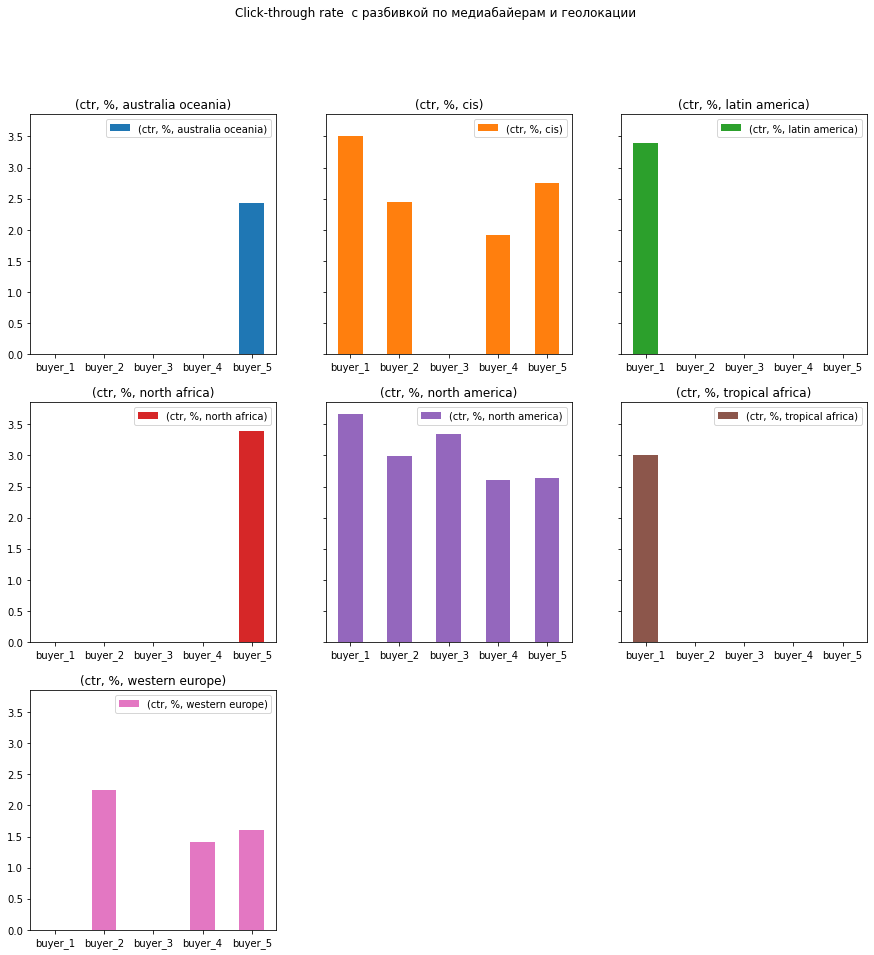

In [12]:
# Столбчатые диаграммы для CTR по каждому байеру и гео
(
    ctr
    .unstack(level=0)
    .plot(kind='bar',
          figsize=(15, 15),
          layout=(3, 3),
          subplots=True,
          sharex=False,
          sharey=True,
          xlabel='',
          rot=0,
          title='Click-through rate  с разбивкой по медиабайерам и геолокации')
);

Также рассчитаем метрику отдельно на основе различных геолокаций и медиабайеров, чтобы понять, какие местоположения или байеры работают лучше.

In [13]:
# Click-through rate с разбивкой только по гео
ctr = data.groupby(['geo'])[['clicks', 'impressions']].apply(sum)
ctr['ctr, %'] = round(ctr['clicks'] / ctr['impressions'] * 100, 2)
ctr = ctr.drop(['clicks', 'impressions'], axis=1)

# Вывод таблицы на экран
ctr.sort_values(by='ctr, %', ascending=False)

ctr, %
geo                      
north america        3.54
latin america        3.39
north africa         3.39
tropical africa      3.01
cis                  2.72
australia oceania    2.43
western europe       2.14

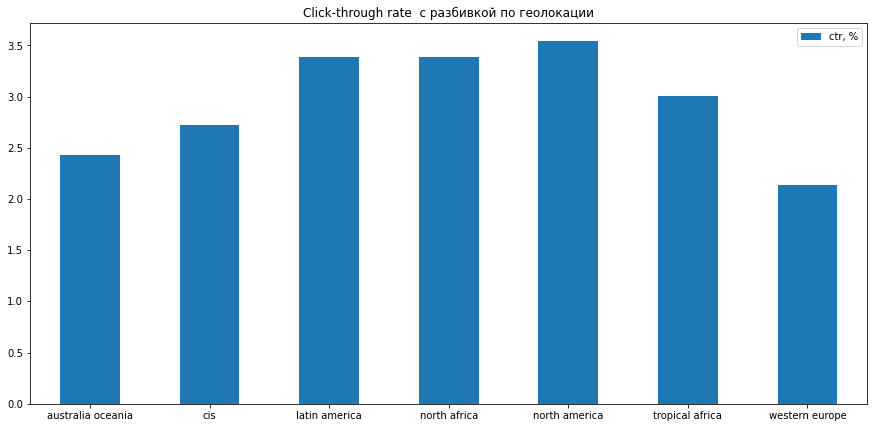

In [14]:
# Столбчатая диаграмма для CTR с разбивкой по гео
(
    ctr
    .plot(kind='bar',
          figsize=(15, 7),
          xlabel='',
          rot=0,
          title='Click-through rate  с разбивкой по геолокации')
);

In [15]:
# Click-through rate с разбивкой только по байерам
ctr = data.groupby(['buyer'])[['clicks', 'impressions']].apply(sum)
ctr['ctr, %'] = round(ctr['clicks'] / ctr['impressions'] * 100, 2)
ctr = ctr.drop(['clicks', 'impressions'], axis=1)

# Вывод таблицы на экран
ctr.sort_values(by='ctr, %', ascending=False)

ctr, %
buyer          
buyer_1    3.63
buyer_3    3.35
buyer_5    3.23
buyer_2    2.60
buyer_4    2.28

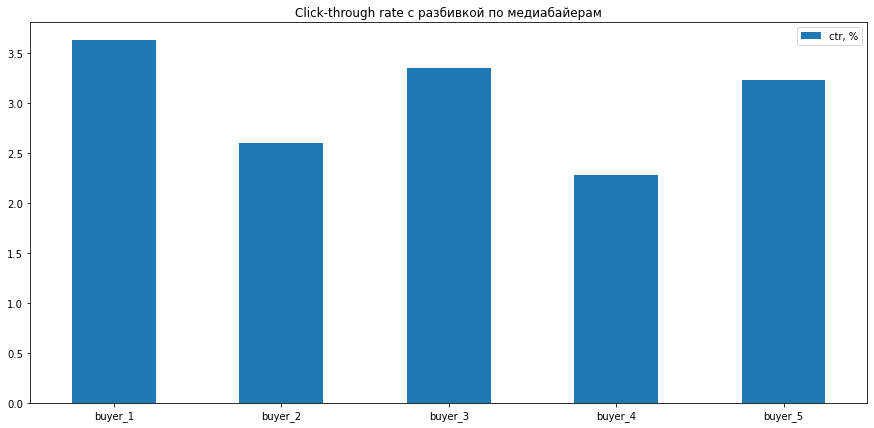

In [16]:
# Столбчатая диаграмма для CTR с разбивкой по байерам
(
    ctr
    .plot(kind='bar',
          figsize=(15, 7),
          xlabel='',
          rot=0,
          title='Click-through rate с разбивкой по медиабайерам')
);

**Выводы по Click-through rate:**

1) Наиболее высокий показатель кликов были в кампании `24` (почти 8% людей кликнуло на рекламу), затем в ТОП-5 идут кампании `53` (6.46%), `47` (5.64%), `45`(5.43%) и `79`	(5.12%).

2) Лучше всего кликают в `north america` (в среднем приходится 3.54% кликов), хуже всего - `western europe`	(2.14%).

3) Байер `1` привлекает клиентов, которые кликают в среднем немного чаще (3.63%), а байер `4` - тех, кто кликает на объявление с рекламой реже (2.28%).

<a id="cr"></a>

### 3.2 Conversion rate

Оценим **коэффициент конверсии** — процент пользователей, которые совершают желаемое действие после нажатия на объявление. Желаемым действием может быть установка приложения, регистрация или покупка. Формула коэффициента конверсии:

```
CR = (Installs / Impressions) * 100

CR = (Registrations / Impressions) * 100

CR = (Payers / Impressions) * 100

```
Сначала оценим метрику для каждой отдельной кампании, а затем посмотрим на общую картину в разрезе медиабайеров и геолокаций.

Подсчитаем конверсию, а также построим графики истории изменений количества конверсии в платящих пользователей, чтобы проанализировать доход, полученный в разные дни после регистрации пользователя, чтобы понять, как доход меняется с течением времени, и соответствующим образом оптимизировать свои будущие кампании.

In [17]:
# Объявляем функцию для подсчета, вывода и визуализации конверсии
def conversion_rate(conversion, groups=['geo', 'buyer']):
    
    # Подсчет Conversion rate
    cr = data.groupby(groups)[[conversion, 'impressions']].apply(sum)
    cr['cr, %'] = round(cr[conversion] / cr['impressions'] * 100, 2)
    cr = cr.drop([conversion, 'impressions'], axis=1)
    
    # Вывод таблицы на экран
    display(cr.sort_values(by='cr, %', ascending=False))
    
    # Визаулизация
    if len(groups) == 2: # Для конверсии с разбивкой по гео и медиабайерам
        print(
            cr
            .unstack(level=0)
            .plot(kind='bar',
                  figsize=(15, 15),
                  layout=(3, 3),
                  subplots=True,
                  sharex=False,
                  sharey=True,
                  xlabel='',
                  rot=0,
                  title='Конверсия с разбивкой по гео и медиабайерам')
        )
        
    
    else: # Для конверсии с без разбивки
        print(
        cr
        .plot(kind='bar',
              figsize=(15, 7),
              xlabel='',
              rot=0,
              title='Конверсия')
        )


<a id="cr_ist"></a>

#### 3.2.1 Конверсия в скачивания

In [18]:
# Conversion rate в скачивания для каждой кампании
data['cr_installs_%'] = round(data['installs'] / data['impressions'] * 100, 2)

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cr_installs_%', ascending=False).head()[['cr_installs_%']]

cr_installs_%
Campaign_id               
47                    1.99
68                    1.89
79                    1.88
80                    1.78
12                    1.78

cr, %
geo               buyer         
north america     buyer_2   1.51
                  buyer_5   1.33
cis               buyer_2   1.15
north america     buyer_3   1.13
cis               buyer_1   1.12
latin america     buyer_1   1.12
western europe    buyer_2   1.09
north america     buyer_4   1.05
north africa      buyer_5   1.02
north america     buyer_1   1.00
cis               buyer_5   0.97
tropical africa   buyer_1   0.86
western europe    buyer_5   0.69
                  buyer_4   0.49
australia oceania buyer_5   0.46
cis               buyer_4   0.38

[[<AxesSubplot:title={'center':'(cr, %, australia oceania)'}>
  <AxesSubplot:title={'center':'(cr, %, cis)'}>
  <AxesSubplot:title={'center':'(cr, %, latin america)'}>]
 [<AxesSubplot:title={'center':'(cr, %, north africa)'}>
  <AxesSubplot:title={'center':'(cr, %, north america)'}>
  <AxesSubplot:title={'center':'(cr, %, tropical africa)'}>]
 [<AxesSubplot:title={'center':'(cr, %, western europe)'}> <AxesSubplot:>
  <AxesSubplot:>]]


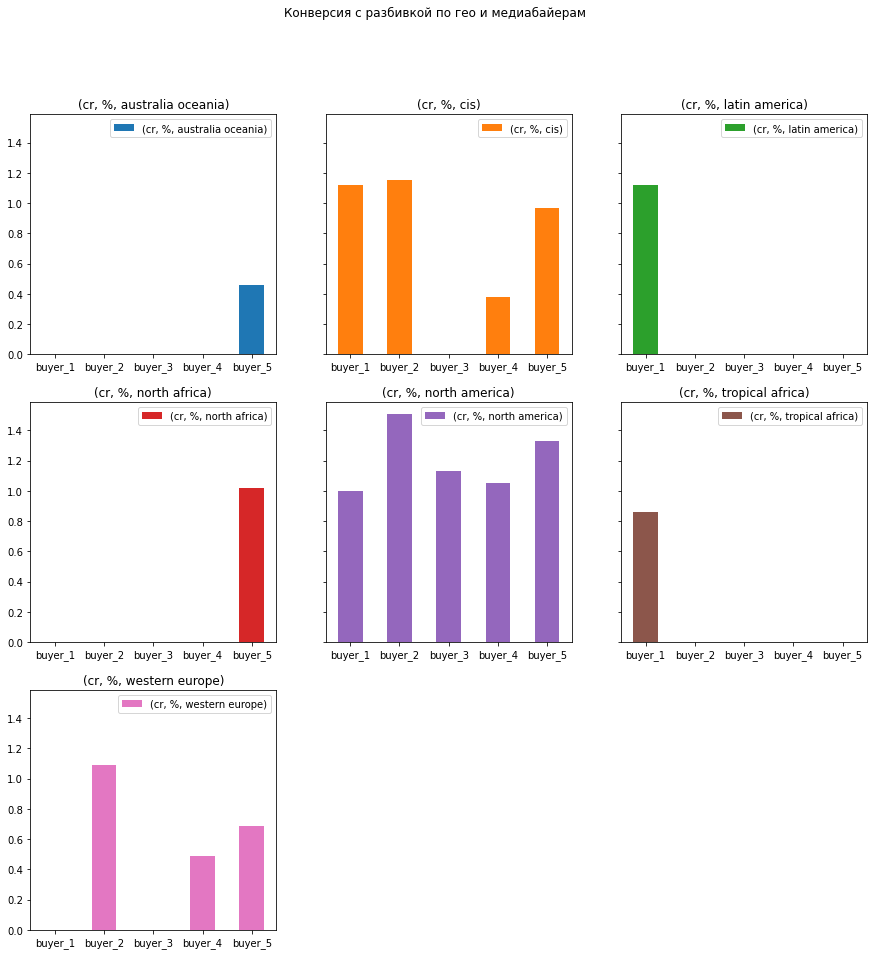

In [19]:
# Конверсия в скачивания с разбивкой по медиабайерам и геолокации
conversion_rate('installs')

Посмотрим как себя показали местоположения или байеры, рассчитав метрику отдельно на основе различных геолокаций и медиабайеров.

cr, %
buyer         
buyer_2   1.28
buyer_3   1.13
buyer_1   1.01
buyer_5   1.00
buyer_4   0.85

AxesSubplot(0.125,0.125;0.775x0.755)


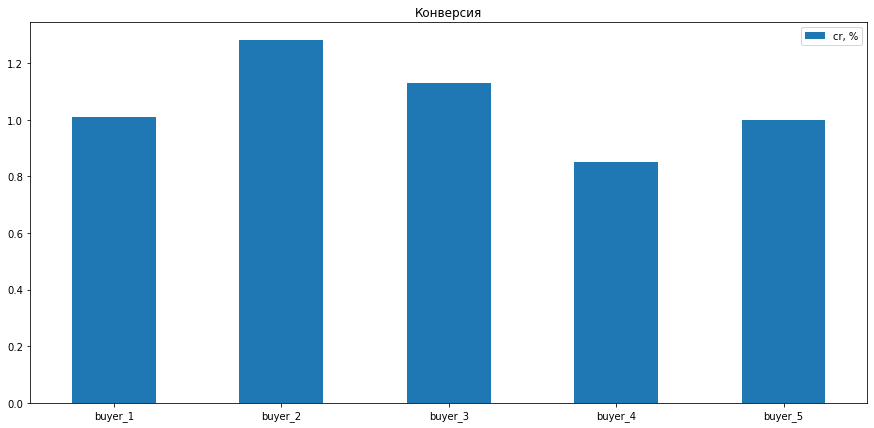

In [20]:
# Конверсия в скачивания по медиабайерам
conversion_rate('installs', ['buyer'])

cr, %
geo                     
latin america       1.12
cis                 1.07
north america       1.07
north africa        1.02
western europe      1.02
tropical africa     0.86
australia oceania   0.46

AxesSubplot(0.125,0.125;0.775x0.755)


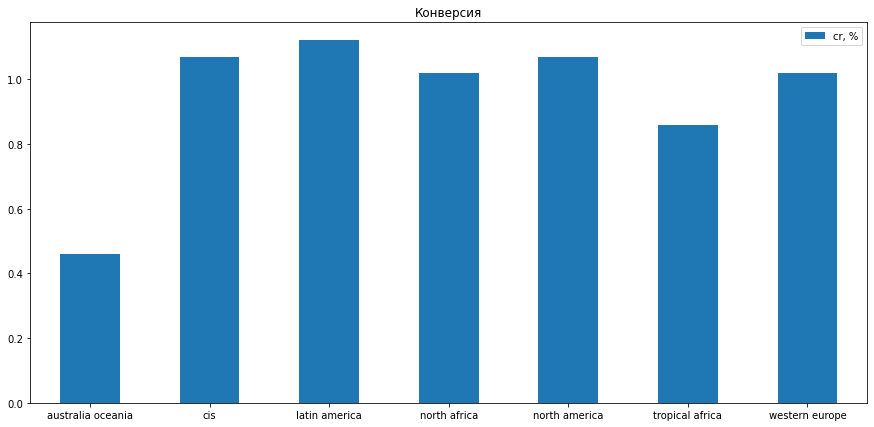

In [21]:
# Конверсия в скачивания по гео
conversion_rate('installs', ['geo'])

<a id="cr_reg"></a>

#### 3.2.2 Конверсия в регистрацию

In [22]:
# Conversion rate в регистрацию для каждой кампании
data['cr_registrations_%'] = round(data['registrations'] / data['impressions'] * 100, 2)

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cr_registrations_%', ascending=False).head()[['cr_registrations_%']]

cr_registrations_%
Campaign_id                    
64                         1.12
45                         1.05
9                          1.05
14                         1.03
2                          1.00

cr, %
geo               buyer         
north america     buyer_2   0.89
                  buyer_3   0.76
north africa      buyer_5   0.75
north america     buyer_5   0.75
western europe    buyer_2   0.73
north america     buyer_4   0.70
cis               buyer_1   0.69
latin america     buyer_1   0.67
north america     buyer_1   0.64
cis               buyer_2   0.61
tropical africa   buyer_1   0.53
australia oceania buyer_5   0.41
western europe    buyer_5   0.37
                  buyer_4   0.33
cis               buyer_5   0.22
                  buyer_4   0.10

[[<AxesSubplot:title={'center':'(cr, %, australia oceania)'}>
  <AxesSubplot:title={'center':'(cr, %, cis)'}>
  <AxesSubplot:title={'center':'(cr, %, latin america)'}>]
 [<AxesSubplot:title={'center':'(cr, %, north africa)'}>
  <AxesSubplot:title={'center':'(cr, %, north america)'}>
  <AxesSubplot:title={'center':'(cr, %, tropical africa)'}>]
 [<AxesSubplot:title={'center':'(cr, %, western europe)'}> <AxesSubplot:>
  <AxesSubplot:>]]


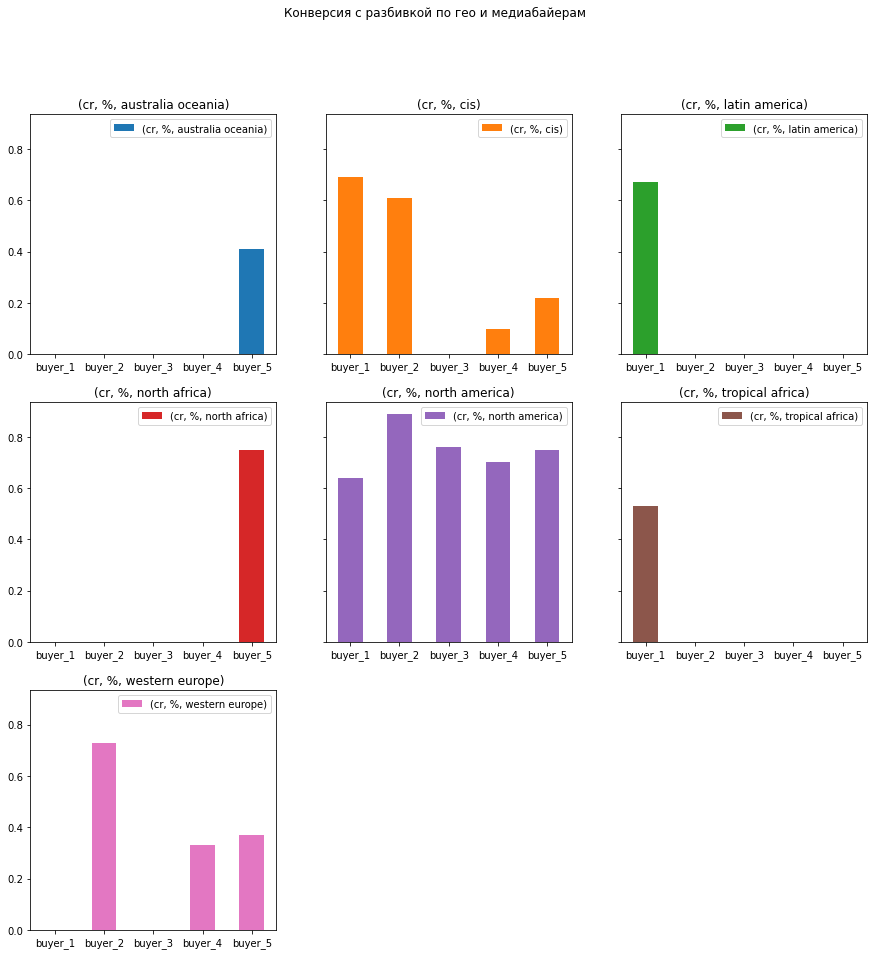

In [23]:
# Конверсия в регистрацию с разбивкой по медиабайерам и геолокации
conversion_rate('registrations')

Также подсчитаем отдельно конверсию для каждой геолокации и для каждого медиабайера.

cr, %
buyer         
buyer_2   0.77
buyer_3   0.76
buyer_5   0.69
buyer_1   0.64
buyer_4   0.55

AxesSubplot(0.125,0.125;0.775x0.755)


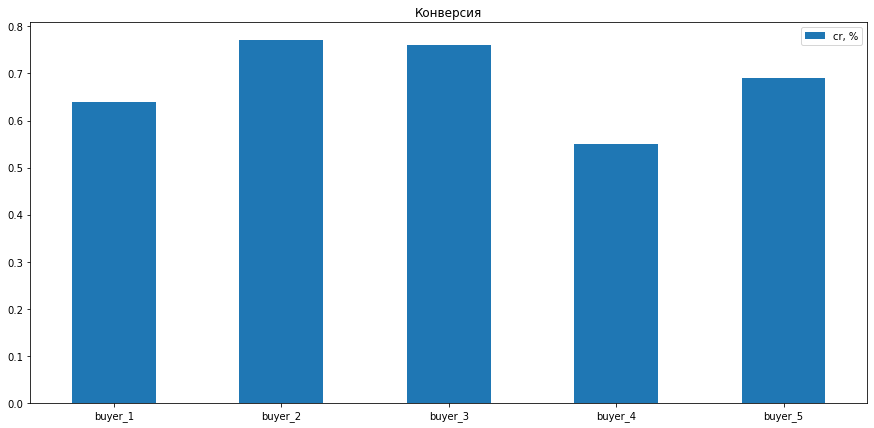

In [24]:
# Конверсия в регистрацию по медиабайерам
conversion_rate('registrations', ['buyer'])

cr, %
geo                     
north africa        0.75
north america       0.68
western europe      0.68
latin america       0.67
cis                 0.56
tropical africa     0.53
australia oceania   0.41

AxesSubplot(0.125,0.125;0.775x0.755)


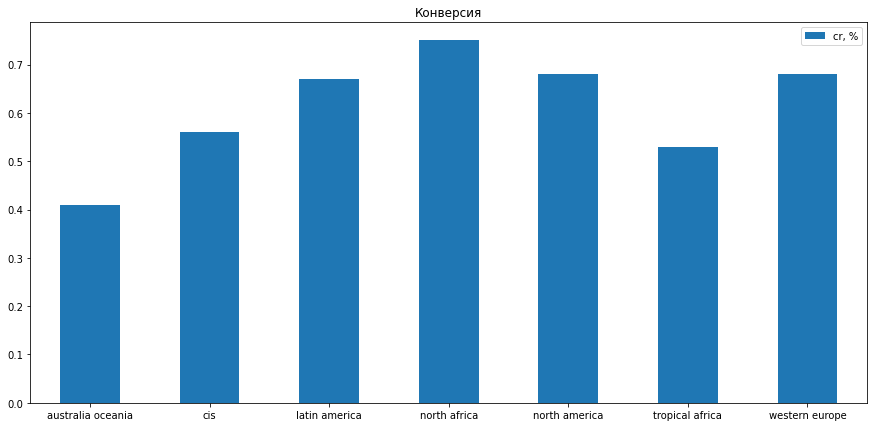

In [25]:
# Конверсия в регистрацию по геолокации
conversion_rate('registrations', ['geo'])

<a id="cr_pay"></a>

#### 3.2.3 Конверсия в платящих пользователей

Посмотрим, как меняется конверсия в платаящих пользователей на 1, 7 и 30 лайфтайм пользователей.

In [26]:
# Conversion rate в  платящих пользователей для каждой кампании на первый день лайфтайма
data['cr_payers1d_%'] = data['payers1d'] / data['impressions'] * 100

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cr_payers1d_%', ascending=False).head()[['cr_payers1d_%']]

cr_payers1d_%
Campaign_id               
64                0.039448
58                0.027571
79                0.024746
31                0.014494
53                0.013407

In [27]:
# Conversion rate в  платящих пользователей для каждой кампании  на седьмой день лайфтайма
data['cr_payers7d_%'] = data['payers7d'] / data['impressions'] * 100

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cr_payers7d_%', ascending=False).head()[['cr_payers7d_%']]

cr_payers7d_%
Campaign_id               
79                0.049493
64                0.039448
58                0.027571
31                0.014494
9                 0.013737

In [28]:
# Conversion rate в  платящих пользователей для каждой кампании  на 30й день лайфтайма
data['cr_payers30d_%'] = data['payers30d'] / data['impressions'] * 100

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cr_payers30d_%', ascending=False).head()[['cr_payers30d_%']]

cr_payers30d_%
Campaign_id                
79                 0.049493
64                 0.039448
58                 0.027571
55                 0.019948
25                 0.018888

cr1d, %   cr7d, %  cr30d, %
buyer                                
buyer_1  0.001555  0.001891  0.001987
buyer_2  0.002591  0.003575  0.004093
buyer_3  0.004756  0.006242  0.007729
buyer_4  0.004165  0.004165  0.004486
buyer_5  0.000090  0.000090  0.000181

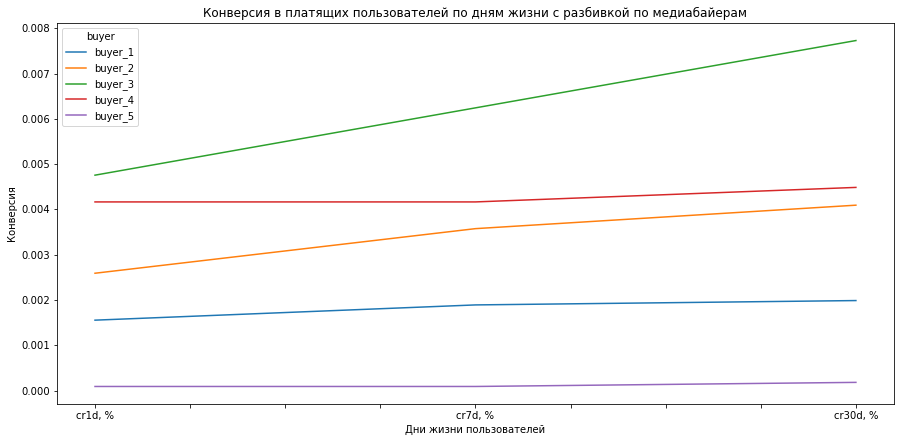

In [29]:
# Конверсия в платящих пользователей с разбивкой по медиабайерам
cr = data.groupby(['buyer'])[['payers1d', 'payers7d', 'payers30d', 'impressions']].apply(sum)
cr['cr1d, %'] = cr['payers1d'] / cr['impressions'] * 100
cr['cr7d, %'] = cr['payers7d'] / cr['impressions'] * 100
cr['cr30d, %'] = cr['payers30d'] / cr['impressions'] * 100
cr = cr.drop(['payers1d', 'payers7d', 'payers30d', 'impressions'], axis=1)

# Вывод таблицы на экран
display(cr)

# Визуализация
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_ylabel('Конверсия')
ax.set_xlabel('Дни жизни пользователей')
ax.set_title('Конверсия в платящих пользователей по дням жизни с разбивкой по медиабайерам')
cr.T.plot(ax=ax);

cr1d, %   cr7d, %  cr30d, %
geo                                            
australia oceania  0.000000  0.000000  0.000000
cis                0.001782  0.002330  0.002604
latin america      0.001148  0.001340  0.001531
north africa       0.000000  0.000000  0.000000
north america      0.002205  0.002720  0.002999
tropical africa    0.000000  0.000000  0.000000
western europe     0.000967  0.001571  0.001692

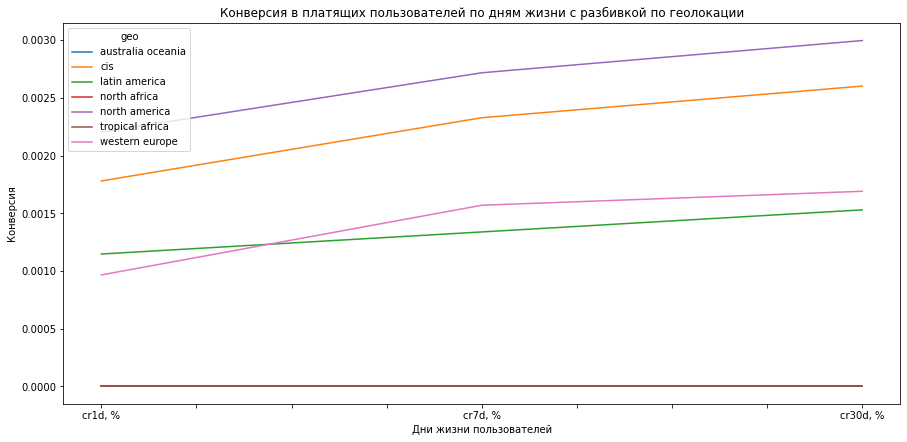

In [30]:
# Конверсия в платящих пользователей с разбивкой по геолокации
cr = data.groupby(['geo'])[['payers1d', 'payers7d', 'payers30d', 'impressions']].apply(sum)
cr['cr1d, %'] = cr['payers1d'] / cr['impressions'] * 100
cr['cr7d, %'] = cr['payers7d'] / cr['impressions'] * 100
cr['cr30d, %'] = cr['payers30d'] / cr['impressions'] * 100
cr = cr.drop(['payers1d', 'payers7d', 'payers30d', 'impressions'], axis=1)

# Вывод таблицы на экран
display(cr)

# Визуализация
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_ylabel('Конверсия')
ax.set_xlabel('Дни жизни пользователей')
ax.set_title('Конверсия в платящих пользователей по дням жизни с разбивкой по геолокации')
cr.T.plot(ax=ax);

**Выводы по Conversion rate:**

1) Наиболее высокая конверсия в скачивания была в кампании `47`	(1.99% скачиваний из всех показов рекламы), затем в ТОП-5 идут кампании `68` (1.89%), `79` (1.88%), `80` и `12` (по 1.78%).

2) Наиболее высокая конверсия в скачивания была у аудитории, привлеченной байером `2` (в среднем 1.28%), наименее высокая конверсия - у аудитории байера `4` (0.85%).

3) Наиболее высокая конверсия в скачивания была у аудитории, привлеченной из `latin america` (1.12%), наименее высокая конверсия - у аудитории `australia oceania` (0.46%).

4) Наиболее высокая конверсия в регистрацию была в кампании `64` (1.12% скачиваний из всех показов рекламы), затем в ТОП-5 идут кампании `45` и `9` (по 1.05%), `14` (1.03%) `2` (по 1%).

5) Наиболее высокая конверсия в регистрацию была у аудитории, привлеченной байером `2` (в среднем 0.77%), наименее высокая конверсия - у аудитории байера `4` (0.55%).

6) Наиболее высокая конверсия в регистрацию была у аудитории, привлеченной из `north africa` (0.75%), наименее высокая конверсия - у аудитории `australia oceania` (0.41%).

7) Наиболее высокая конверсия в платящих пользователей на 1й день жазни пользователей была в компании `64` (0.0394%), затем в ТОП-5 идут кампании `58` (0.0276%), `79` (0.0247%), `31` (0.0145%) и `53` (по 0.0134%).

8) Наиболее высокая конверсия в платящих пользователей на 7й день жазни пользователей была в компании `79` (0.0495%), затем в ТОП-5 идут кампании `64` (0.0394%), `58` (0.0276%), `31` (0.0145%) и `9` (по 0.0137%).

9) Наиболее высокая конверсия в платящих пользователей на 30й день жазни пользователей была в компании `79` (0.0495%), затем в ТОП-5 идут кампании `64` (0.0394%), `58` (0.0276%), `55` (0.0199%) и `25` (по 0.0189%).

10) Конверсия в платящих пользователей по дням жизни наиболее хорошо растет с 1го по 30й день жизни пользователей у медиабайера `3`, а у байера `5` пользователи имеют наихудшую конверсию в платящих пользователей и пости не растут.

11) Конверсия в платящих пользователей по дням жизни наиболее хорошо растет с 1го по 30й день жизни в регионе `north america`, а в регионах `australia oceania`, `north africa`, `tropical africa` пользователи почти не конвертируются в платных.

<a id="roi"></a>

### 3.3 Return on Investments

Подсчитаем **рентабельность расходов на рекламу** (Возврат инвестиций) — метрика, которая помогает покупателям рекламы понять, какой доход они получают на каждый доллар, потраченный на рекламу. Формула ROI:

```
ROI = Revenue_ad / Spend * 100
```

Сначала оценим метрику для каждой отдельной кампании, а затем посмотрим на общую картину в разрезе медиабайеров и геолокаций.

In [31]:
# Возврат инвестиций для каждой кампании на первый день лайфтайма
data['roi1d_%'] = round(data['revenue_ad1d'] / data['spend'] * 100, 2)

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='roi1d_%', ascending=False).head()[['roi1d_%']]

roi1d_%
Campaign_id         
63            114.18
30             95.60
25             73.84
31             73.43
69             72.79

In [32]:
# Возврат инвестиций для каждой кампании на седьмой день лайфтайма
data['roi7d_%'] = round(data['revenue_ad7d'] / data['spend'] * 100, 2)

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='roi7d_%', ascending=False).head()[['roi7d_%']]

roi7d_%
Campaign_id         
63            146.35
30            132.61
31            113.72
25             96.67
85             96.58

In [33]:
# Возврат инвестиций для каждой кампании на 30й день лайфтайма
data['roi30d_%'] = round(data['revenue_ad30d'] / data['spend'] * 100, 2)

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='roi30d_%', ascending=False).head()[['roi30d_%']]

roi30d_%
Campaign_id          
63             224.10
30             213.82
85             150.68
8              147.84
31             140.78

roi1d, %  roi7d, %  roi30d, %
buyer                                 
buyer_1     37.30     46.36      53.74
buyer_2     45.24     63.46      77.84
buyer_3     52.10     75.61     104.76
buyer_4     42.58     59.27      77.70
buyer_5     20.04     29.63      32.94

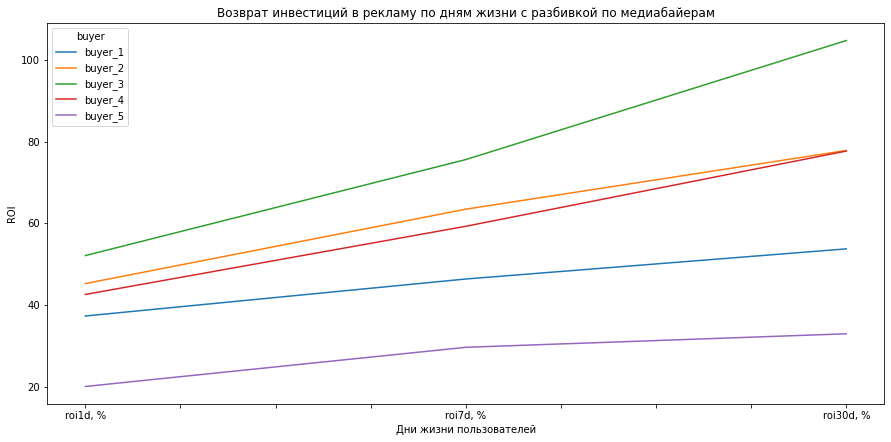

In [34]:
# Возврат инвестиций с разбивкой по медиабайерам
roi = data.groupby(['buyer'])[['revenue_ad1d', 'revenue_ad7d', 'revenue_ad30d', 'spend']].apply(sum)
roi['roi1d, %'] = round(roi['revenue_ad1d'] / roi['spend'] * 100, 2)
roi['roi7d, %'] = round(roi['revenue_ad7d'] / roi['spend'] * 100, 2)
roi['roi30d, %'] = round(roi['revenue_ad30d'] / roi['spend'] * 100, 2)
roi = roi.drop(['revenue_ad1d', 'revenue_ad7d', 'revenue_ad30d', 'spend'], axis=1)

# Вывод таблицы на экран
display(roi)

# Визуализация
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_ylabel('ROI')
ax.set_xlabel('Дни жизни пользователей')
ax.set_title('Возврат инвестиций в рекламу по дням жизни с разбивкой по медиабайерам')
roi.T.plot(ax=ax);

roi1d, %  roi7d, %  roi30d, %
geo                                             
australia oceania      5.51      5.63       5.63
cis                   29.33     40.23      48.28
latin america         24.94     31.36      34.54
north africa           8.23      9.87      10.93
north america         42.94     57.77      70.77
tropical africa       13.19     14.84      15.54
western europe        48.25     67.66      86.93

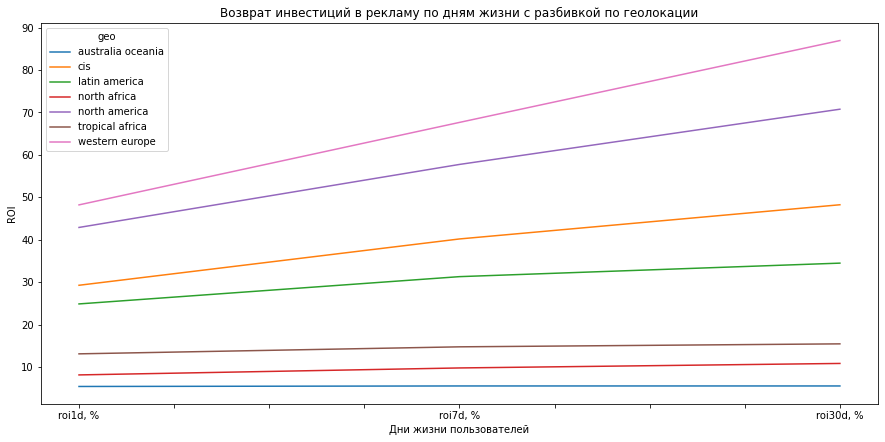

In [35]:
# Возврат инвестиций с разбивкой по геолокации
roi = data.groupby(['geo'])[['revenue_ad1d', 'revenue_ad7d', 'revenue_ad30d', 'spend']].apply(sum)
roi['roi1d, %'] = round(roi['revenue_ad1d'] / roi['spend'] * 100, 2)
roi['roi7d, %'] = round(roi['revenue_ad7d'] / roi['spend'] * 100, 2)
roi['roi30d, %'] = round(roi['revenue_ad30d'] / roi['spend'] * 100, 2)
roi = roi.drop(['revenue_ad1d', 'revenue_ad7d', 'revenue_ad30d', 'spend'], axis=1)

# Вывод таблицы на экран
display(roi)

# Визуализация
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_ylabel('ROI')
ax.set_xlabel('Дни жизни пользователей')
ax.set_title('Возврат инвестиций в рекламу по дням жизни с разбивкой по геолокации')
roi.T.plot(ax=ax);

**Выводы по Return on Investments:**

1) Единственная полностью окупившаяся кампания на 1й день лайфтайма - `63` (принесла 114% от вложенных средств), далее из ТОП-5 наиболее окупающихся кампаний: `30` (95.6%), `25` (73.8%), `31` (73.4%), `69` (72.8%).

2) На 7й день лайфтайма наиболее окупившимися кампаниями стали `63` (146%), `30` (132.6%), `31` (113.7%), `25` (96.7%), `85` (96.6%).

3) На 30й день лайфтайма наиболее окупившимися кампаниями стали `63` (224%), `30` (213.8%), `31` (150.6%), `25` (147.8%), `85` (140.7%).

4) Наиболее прибыльно оказалась кампании `63`, `30` и `85`.

5) Медиабаер `3` окупается лучше всего на протяжение всего отслеживаемого периода жизни пользователей, а межиабайер `5` - окупается хуже всего.

6) Реклама окупается лучше всего в `western europe` и `north america`, а хуже всего - `north africa` и `australia oceania`.

<a id="cac"></a>

### 3.4 Customer Acquisition Cost

Расчитаем **стоимость привлечения клиента** (CAC) — показатель, который помогает понять, во сколько обходится привлечение нового клиента. Формула CAC:

```
CAC = Spend / Registrations

CAC = Spend / Payers

```

Сначала оценим метрику для каждой отдельной кампании, а затем посмотрим на общую картину в разрезе медиабайеров и геолокаций.

In [36]:
# Объявляем функцию для подсчета, вывода и визуализации стоимости привлечения
def cac_rate(conversion, groups=['geo', 'buyer']):
    
    # Подсчет стоимости привлечения пользователя
    cac = data.groupby(groups)[[conversion, 'spend']].apply(sum)
    cac['cac'] = round(cac['spend'] / cac[conversion], 2)
    cac = cac.drop([conversion, 'spend'], axis=1)
    
    # Вывод таблицы на экран
    display(cac)
    
    # Визуализация
    if len(groups) == 2: # Для CAC с разбивкой по гео и медиабайерам
        print(
            cac
            .unstack(level=0)
            .plot(kind='bar',
                  figsize=(15, 15),
                  layout=(3, 3),
                  subplots=True,
                  sharex=False,
                  sharey=True,
                  xlabel='',
                  rot=0,
                  title='CAC с разбивкой по гео и медиабайерам')
        )
        
    
    else: # Для CAC с без разбивки
        print(
        cac
        .plot(kind='bar',
              figsize=(15, 7),
              xlabel='',
              rot=0,
              title='CAC')
        )


<a id="cac_reg"></a>

#### 3.4.1 Стоимость привлечения пользователеля


In [37]:
# Стоимость привлечения пользователеля для каждой кампании
data['cac_registrations'] = round(data['spend'] / data['registrations'], 2)

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cac_registrations', ascending=True).head()[['cac_registrations']]

cac_registrations
Campaign_id                   
21                        0.03
56                        0.05
45                        0.06
27                        0.08
24                        0.08

cac
geo               buyer        
australia oceania buyer_5  2.39
cis               buyer_1  0.28
                  buyer_2  0.28
                  buyer_4  0.92
                  buyer_5  0.37
latin america     buyer_1  0.10
north africa      buyer_5  0.04
north america     buyer_1  0.18
                  buyer_2  0.63
                  buyer_3  0.76
                  buyer_4  0.70
                  buyer_5  1.26
tropical africa   buyer_1  0.09
western europe    buyer_2  0.39
                  buyer_4  0.37
                  buyer_5  0.73

[[<AxesSubplot:title={'center':'(cac, australia oceania)'}>
  <AxesSubplot:title={'center':'(cac, cis)'}>
  <AxesSubplot:title={'center':'(cac, latin america)'}>]
 [<AxesSubplot:title={'center':'(cac, north africa)'}>
  <AxesSubplot:title={'center':'(cac, north america)'}>
  <AxesSubplot:title={'center':'(cac, tropical africa)'}>]
 [<AxesSubplot:title={'center':'(cac, western europe)'}> <AxesSubplot:>
  <AxesSubplot:>]]


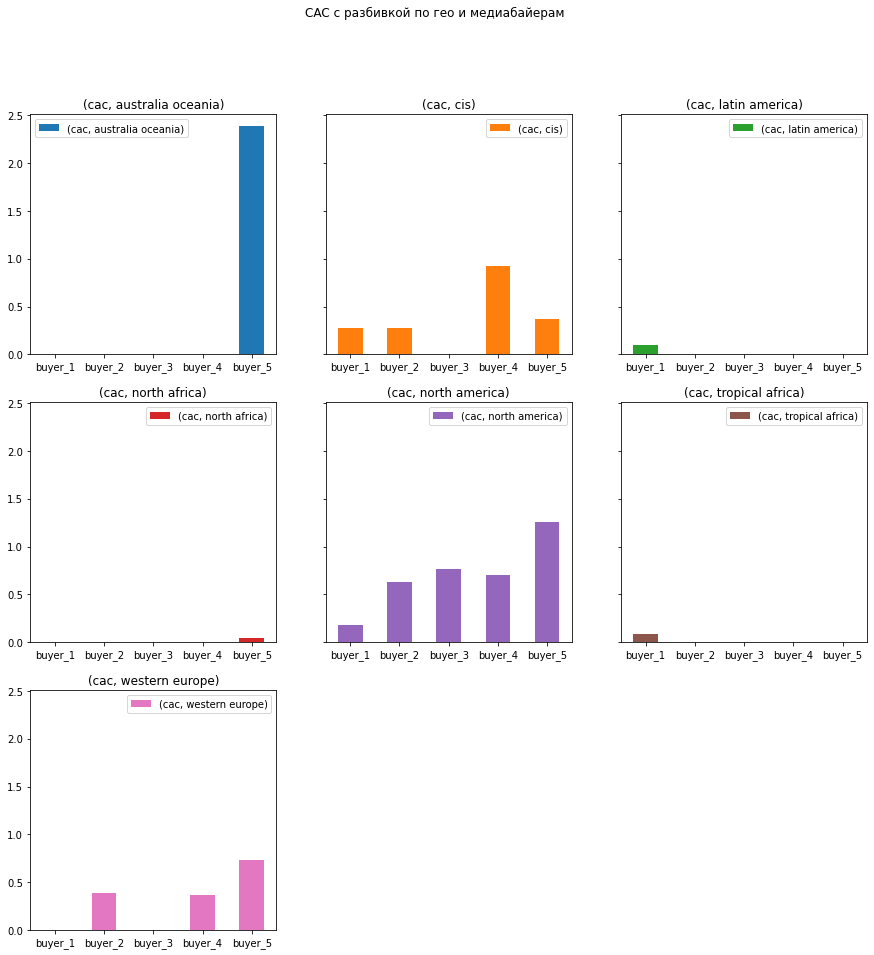

In [38]:
# CAC с разбивкой по гео и медиабайерам
cac_rate('registrations')

Посмотрим отдельно на стоимость привлечения клиентов в разрезе медиабайеров и геолокации.

cac
buyer        
buyer_1  0.18
buyer_2  0.49
buyer_3  0.76
buyer_4  0.67
buyer_5  0.08

AxesSubplot(0.125,0.125;0.775x0.755)


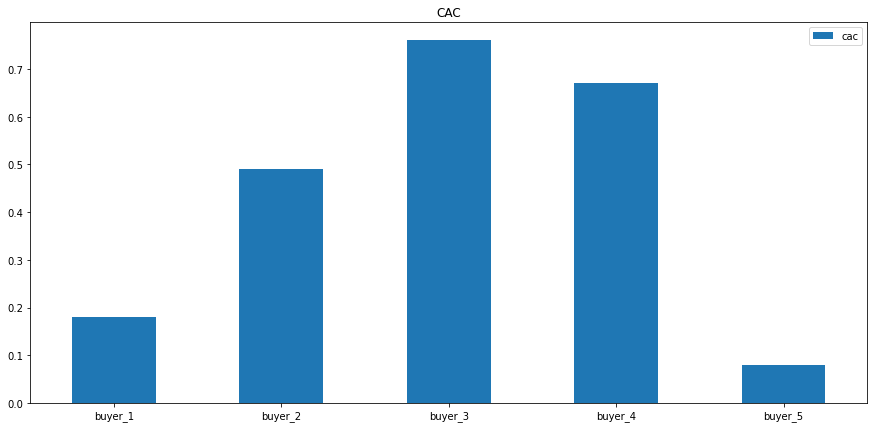

In [39]:
# САС по медиабайерам
cac_rate('registrations', ['buyer'])

cac
geo                    
australia oceania  2.39
cis                0.29
latin america      0.10
north africa       0.04
north america      0.30
tropical africa    0.09
western europe     0.41

AxesSubplot(0.125,0.125;0.775x0.755)


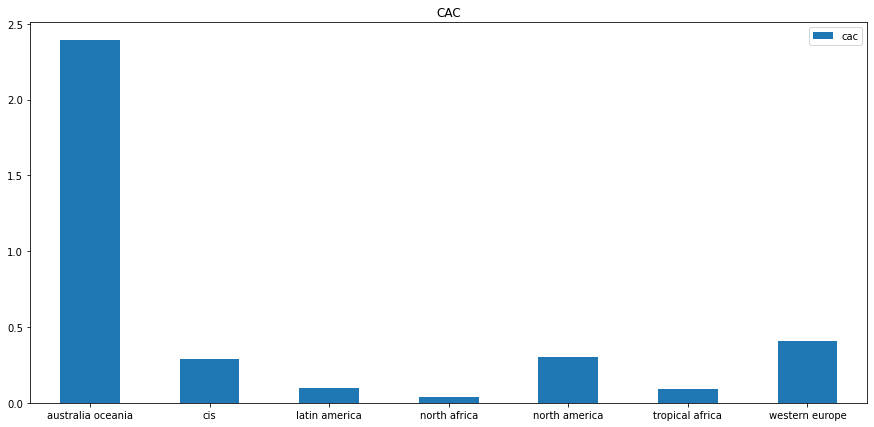

In [40]:
# САС по геолокации
cac_rate('registrations', ['geo'])

<a id="cac_pay"></a>

#### 3.4.1 Стоимость привлечения платящего пользователеля

In [41]:
# Стоимость привлечения платящего пользователеля для каждой кампании на первый день лайфтайма
data['cac_pay1d'] = data['spend'] / data['payers1d']

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cac_pay1d', ascending=True).head()[['cac_pay1d']]

cac_pay1d
Campaign_id           
64           14.115000
86           20.430000
58           21.044999
79           22.049999
70           24.290001

In [42]:
# Стоимость привлечения платящего пользователеля для каждой кампании на седьмой день лайфтайма
data['cac_pay7d'] = data['spend'] / data['payers7d']

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cac_pay7d', ascending=True).head()[['cac_pay7d']]

cac_pay7d
Campaign_id           
79           11.024999
64           14.115000
86           20.430000
58           21.044999
70           24.290001

In [43]:
# Стоимость привлечения платящего пользователеля для каждой кампании на 30й день лайфтайма
data['cac_pay30d'] = data['spend'] / data['payers30d']

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cac_pay30d', ascending=True).head()[['cac_pay30d']]

cac_pay30d
Campaign_id            
79            11.024999
69            12.315000
64            14.115000
86            20.430000
58            21.044999

cac1d     cac7d    cac30d
buyer                                
buyer_1  0.013451  0.016364  0.017196
buyer_2  0.006920  0.009550  0.010934
buyer_3  0.008190  0.010749  0.013308
buyer_4  0.011393  0.011393  0.012269
buyer_5  0.001560  0.001560  0.003120

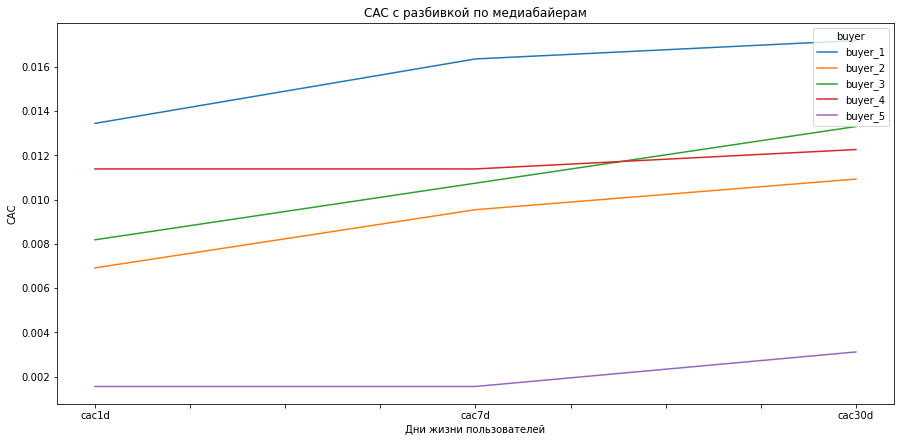

In [44]:
# Стоимость привлечения платящего пользователя c разбивкой по медиабайерам
cac = data.groupby(['buyer'])[['payers1d', 'payers7d', 'payers30d', 'spend']].apply(sum)
cac['cac1d'] = cac['payers1d'] / cac['spend']
cac['cac7d'] = cac['payers7d'] / cac['spend']
cac['cac30d'] = cac['payers30d'] / cac['spend']
cac = cac.drop(['payers1d', 'payers7d', 'payers30d', 'spend'], axis=1)

# Вывод таблицы на экран
display(cac)

# Визуализация динамики CAC с разбивкой по медиабайерам
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_ylabel('CAC')
ax.set_xlabel('Дни жизни пользователей')
ax.set_title('CAC с разбивкой по медиабайерам')
cac.T.plot(ax=ax);

cac1d     cac7d    cac30d
geo                                            
australia oceania  0.000000  0.000000  0.000000
cis                0.010902  0.014256  0.015933
latin america      0.016829  0.019634  0.022439
north africa       0.000000  0.000000  0.000000
north america      0.010680  0.013172  0.014524
tropical africa    0.000000  0.000000  0.000000
western europe     0.003529  0.005734  0.006175

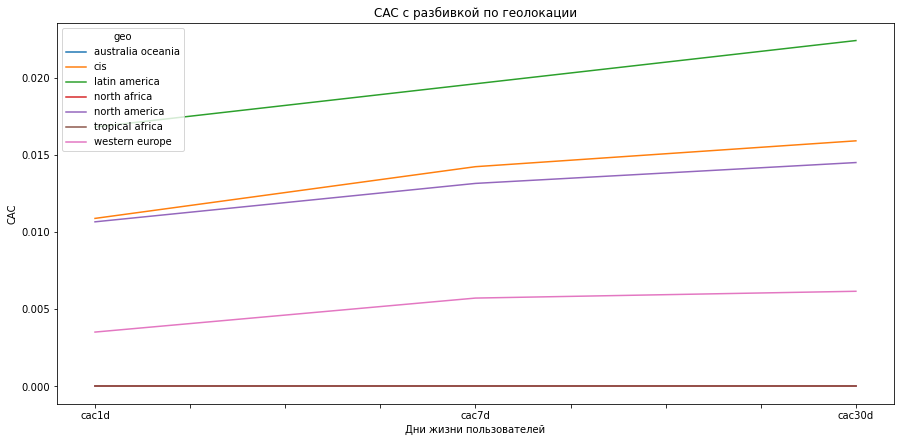

In [45]:
# Стоимость привлечения платящего пользователя c разбивкой по гео
cac = data.groupby(['geo'])[['payers1d', 'payers7d', 'payers30d', 'spend']].apply(sum)
cac['cac1d'] = cac['payers1d'] / cac['spend']
cac['cac7d'] = cac['payers7d'] / cac['spend']
cac['cac30d'] = cac['payers30d'] / cac['spend']
cac = cac.drop(['payers1d', 'payers7d', 'payers30d', 'spend'], axis=1)

# Вывод таблицы на экран
display(cac)

# Визуализация динамики CAC с разбивкой по гео
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_ylabel('CAC')
ax.set_xlabel('Дни жизни пользователей')
ax.set_title('CAC с разбивкой по геолокации')
cac.T.plot(ax=ax);

**Выводы по Customer Acquisition Cost:**

1) Наиболее дешевые пользователи пришли из кампаний: `21` (цена одного пользователя = 0.03), `56` (0.05), `45` (0.06), `27` и `24` (по 0.08).

2) Наиболее дешевые пользователи пришли от `5` медиабаера (средняя цена одного пользователя = 0.08), а самые дорогие пользователи пришли от `1` (0.08).

3) Наиболее дешевые пользователи пришли из региона `north africa` (0.04), а самые дорогие пользователи приходят из региона `australia oceania` (2.39)

3) На 1й день жизни пользователей наиболее дешевые платящие пользователи из кампаний `64` (цена одного платящего пользователя = 14.12), `86` (20.43), `58` (21.05), `79` (22.05) и `70` (24.29).

4) На 7й день жизни пользователей наиболее дешевые платящие пользователи из кампаний `79` (11.025), `64` (14.12), `86` (20.43), `58` (21.05) и `70` (24.29)

5) На 30й день жизни пользователей наиболее дешевые платящие пользователи из кампаний `79` (11.03), `69` (12.32), `64` (14.12), `86` (20.43), `58` (21.05).

6) Наиболее дешевые платящие пользователи приходили от `5` медиабаера, а самые дорогие пользователи приходили от `1`, на продяжение всего отслеживаемого периода.

7) Наиболее дешевые платящие пользователи приходили из региона `north africa` (0.04), а самые дорогие пользователи приходили из региона `latin america`.

<a id="ltv"></a>

### 3.5 Lifetime Value

Подсчитаем **пожизненную ценность клиента** (LTV) — метрику, которая помогает понять, какой доход можно ожидать от клиента в течение пользования приложением.

```
LTV = Revenue_in_app / Payers
```

Сначала оценим метрику для каждой отдельной кампании, а затем посмотрим на общую картину в разрезе геолокаций.

In [46]:
# Пожизненная ценность для каждой кампании на первый день лайфтайма
data['ltv1d'] = data['revenue_in_app1d'] / data['payers1d']

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='ltv1d', ascending=False).head()[['ltv1d']]

ltv1d
Campaign_id        
8            15.390
33            8.735
53            8.390
23            8.390
19            5.940

In [47]:
# Пожизненная ценность для каждой кампании на седьмой день лайфтайма
data['ltv7d'] = data['revenue_in_app7d'] / data['payers7d']

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='ltv7d', ascending=False).head()[['ltv7d']]

ltv7d
Campaign_id           
8            13.056667
7            10.720000
33            9.080001
53            8.390000
23            8.390000

In [48]:
# Пожизненная ценность для каждой кампании на 30й день лайфтайма
data['ltv30d'] = data['revenue_in_app30d'] / data['payers30d']

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='ltv30d', ascending=False).head()[['ltv30d']]

ltv30d
Campaign_id           
33           13.275001
8            11.890000
7            10.720000
23            8.390000
29            8.390000

ltv1d     ltv7d    ltv30d
geo                                            
australia oceania  0.000000  0.000000  0.000000
cis                1.760769  2.159412  2.911053
latin america      1.113333  1.174286  2.110000
north africa       0.000000  0.000000  0.000000
north america      2.922533  3.232378  4.129412
tropical africa    0.000000  0.000000  0.000000
western europe     3.077500  2.494615  3.610714

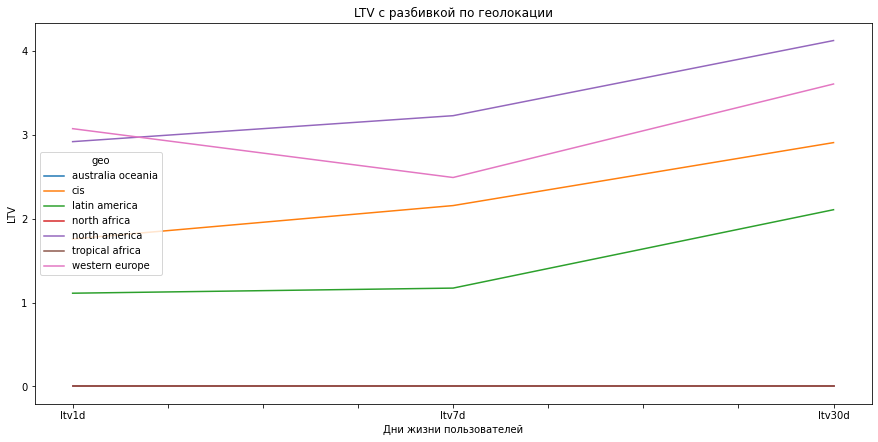

In [49]:
# LTV c разбивкой по геолокации
ltv = data.groupby(['geo'])[['payers1d', 'payers7d', 'payers30d', 
                               'revenue_in_app1d', 'revenue_in_app7d', 'revenue_in_app30d']].apply(sum)
ltv['ltv1d'] = ltv['revenue_in_app1d'] / ltv['payers1d']
ltv['ltv7d'] = ltv['revenue_in_app7d'] / ltv['payers7d'] 
ltv['ltv30d'] = ltv['revenue_in_app30d'] / ltv['payers30d']
ltv = (
    ltv
    .drop(['payers1d', 'payers7d', 'payers30d', 
           'revenue_in_app1d', 'revenue_in_app7d', 'revenue_in_app30d'], axis=1)
    .fillna(0)
)

# Вывод таблицы на экран
display(ltv)

# Визуализация динамики LTV с разбивкой по гео
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_ylabel('LTV')
ax.set_xlabel('Дни жизни пользователей')
ax.set_title('LTV с разбивкой по геолокации')
ltv.T.plot(ax=ax);

**Выводы по  Lifetime Value:**

1) Наиболее высокая пожизненная ценность клиента на 1й день лайфтайма была в кампании `8` (пользователь в среднем принес (15.39), `33` (8.74), `53` и `23` (по 8.39), `19` (5.94).

1) Наиболее высокая пожизненная ценность клиента на 7й день лайфтайма была в кампании `8` (13.06), `7` (10.72), `33` (9.08), `53` и `23` (по 8.39).

3) Наиболее высокая пожизненная ценность клиента на 30й день лайфтайма была в кампании `33` (13.28), `8` (11.89), `7` (10.72), `23` и `29` (по 8.39).

4) Наиболее высокая пожизненная ценность клиента в регионе `north america`, в то время как пользователи в регионах `australia oceania`, `north africa` и `tropical africa` почти не приносят ценности.

<a id="cpi"></a>

### 3.6 Cost per install 

Подсчитаем **стоимость скачивания** (CPI) — рекламную метрику, применяемую в мобильном интернет-маркетинге, которая показывает стоимость установки приложения. 

```
CPI = Spend / Installs

```

Сначала оценим метрику для каждой отдельной кампании, а затем посмотрим на общую картину в разрезе геолокаций и медиабайеров.

In [50]:
# Стоимость скачивания для каждой кампании
data['cpi'] = data['spend'] / data['installs']

# Вывод первых пяти компаний по данной метрике
data.sort_values(by='cpi', ascending=True).head()[['cpi']]

cpi
Campaign_id          
21           0.025330
56           0.027341
45           0.035084
27           0.045905
41           0.051174

Для подсчета CPI в разрезе геолокаций и медиабайеров удобно использовать самописную функцию `cac_rate`, подставив в качестве аргументов нужные значения.

cac
geo               buyer        
australia oceania buyer_5  2.15
cis               buyer_1  0.17
                  buyer_2  0.15
                  buyer_4  0.24
                  buyer_5  0.08
latin america     buyer_1  0.06
north africa      buyer_5  0.03
north america     buyer_1  0.12
                  buyer_2  0.37
                  buyer_3  0.51
                  buyer_4  0.47
                  buyer_5  0.71
tropical africa   buyer_1  0.05
western europe    buyer_2  0.26
                  buyer_4  0.25
                  buyer_5  0.38

[[<AxesSubplot:title={'center':'(cac, australia oceania)'}>
  <AxesSubplot:title={'center':'(cac, cis)'}>
  <AxesSubplot:title={'center':'(cac, latin america)'}>]
 [<AxesSubplot:title={'center':'(cac, north africa)'}>
  <AxesSubplot:title={'center':'(cac, north america)'}>
  <AxesSubplot:title={'center':'(cac, tropical africa)'}>]
 [<AxesSubplot:title={'center':'(cac, western europe)'}> <AxesSubplot:>
  <AxesSubplot:>]]


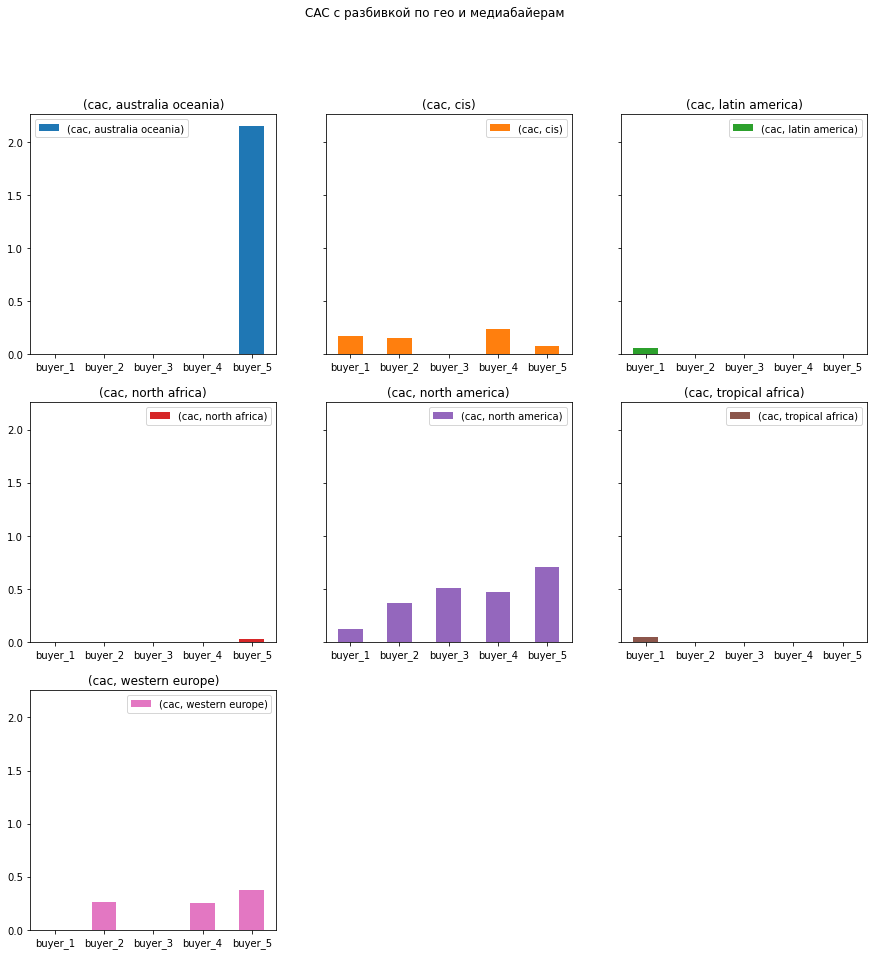

In [51]:
# CPI с разбивкой по гео и медиабайерам
cac_rate('installs')

cac
geo                    
australia oceania  2.15
cis                0.15
latin america      0.06
north africa       0.03
north america      0.19
tropical africa    0.05
western europe     0.27

AxesSubplot(0.125,0.125;0.775x0.755)


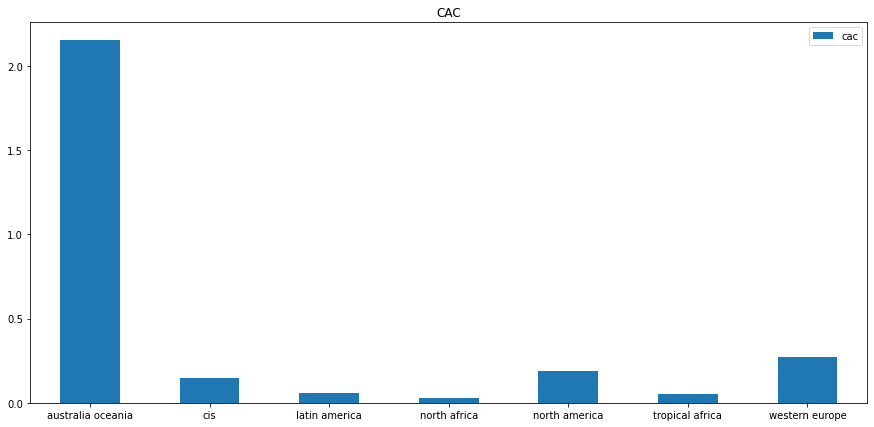

In [52]:
# CPI с разбивкой по гео
cac_rate('installs', ['geo'])

cac
buyer        
buyer_1  0.11
buyer_2  0.29
buyer_3  0.51
buyer_4  0.43
buyer_5  0.06

AxesSubplot(0.125,0.125;0.775x0.755)


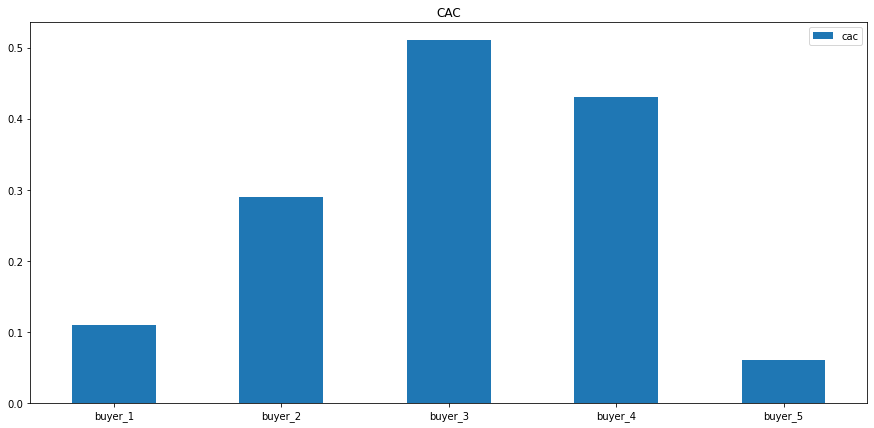

In [53]:
# CPI с разбивкой по медиабайерам
cac_rate('installs', ['buyer'])

**Выводы по Cost per install:**

1) Наиболее дешевая стоимость скачивания приложения была в кампаниях `21` (цена одного скачивания = 0.025), далее в ТОП-5 идут камания `56` (0.027), `45` (0.035), `27` (0.046), `41` (0.051).

2) Наиболее дешевая стоимость скачивания в регионе `north africa` (0.03), а самая дорогая - `australia oceania` (2.15).

3) Наиболее дорогая стоимость скачивания у аудитории, приходящей от медиабайера `3` (цена одного скачивания = 0.51), а самая дешевая цена скачивания - у медиабайера `5` (0.06).

<a id="conclusion"></a>

## 4. Общий вывод

**Входные данные:** доступны данные по работе рекламных кампаний, запущенных пятью медиабайерами для привлечения пользователей в наше приложение.

**Цель:** исследовать данные и получить из них выводы, которые могут быть полезны для дальнейшей работы медиабайеров.

### Результаты:

**1. Click-through rate:**

- Наиболее высокий показатель кликов были в кампании `24` (почти 8% людей кликнуло на рекламу), затем в ТОП-5 идут кампании `53` (6.46%), `47` (5.64%), `45`(5.43%) и `79`	(5.12%).

- Лучше всего кликают в `north america` (в среднем приходится 3.54% кликов), хуже всего - `western europe`	(2.14%).

- Байер `1` привлекает клиентов, которые кликают в среднем немного чаще (3.63%), а байер `4` - тех, кто кликает на объявление с рекламой реже (2.28%).

**2. Conversion rate:**

- Наиболее высокая конверсия в скачивания была в кампании `47`	(1.99% скачиваний из всех показов рекламы), затем в ТОП-5 идут кампании `68` (1.89%), `79` (1.88%), `80` и `12` (по 1.78%).

- Наиболее высокая конверсия в скачивания была у аудитории, привлеченной байером `2` (в среднем 1.28%), наименее высокая конверсия - у аудитории байера `4` (0.85%).

- Наиболее высокая конверсия в скачивания была у аудитории, привлеченной из `latin america` (1.12%), наименее высокая конверсия - у аудитории `australia oceania` (0.46%).

- Наиболее высокая конверсия в регистрацию была в кампании `64` (1.12% скачиваний из всех показов рекламы), затем в ТОП-5 идут кампании `45` и `9` (по 1.05%), `14` (1.03%) `2` (по 1%).

- Наиболее высокая конверсия в регистрацию была у аудитории, привлеченной байером `2` (в среднем 0.77%), наименее высокая конверсия - у аудитории байера `4` (0.55%).

- Наиболее высокая конверсия в регистрацию была у аудитории, привлеченной из `north africa` (0.75%), наименее высокая конверсия - у аудитории `australia oceania` (0.41%).

- Наиболее высокая конверсия в платящих пользователей на 1й день жазни пользователей была в компании `64` (0.0394%), затем в ТОП-5 идут кампании `58` (0.0276%), `79` (0.0247%), `31` (0.0145%) и `53` (по 0.0134%).

- Наиболее высокая конверсия в платящих пользователей на 7й день жазни пользователей была в компании `79` (0.0495%), затем в ТОП-5 идут кампании `64` (0.0394%), `58` (0.0276%), `31` (0.0145%) и `9` (по 0.0137%).

- Наиболее высокая конверсия в платящих пользователей на 30й день жазни пользователей была в компании `79` (0.0495%), затем в ТОП-5 идут кампании `64` (0.0394%), `58` (0.0276%), `55` (0.0199%) и `25` (по 0.0189%).

- Конверсия в платящих пользователей по дням жизни наиболее хорошо растет с 1го по 30й день жизни пользователей у медиабайера `3`, а у байера `5` пользователи имеют наихудшую конверсию в платящих пользователей и пости не растут.

- Конверсия в платящих пользователей по дням жизни наиболее хорошо растет с 1го по 30й день жизни в регионе `north america`, а в регионах `australia oceania`, `north africa`, `tropical africa` пользователи почти не конвертируются в платных.


**3. Return on Investments:**

- Единственная полностью окупившаяся кампания на 1й день лайфтайма - `63` (принесла 114% от вложенных средств), далее из ТОП-5 наиболее окупающихся кампаний: `30` (95.6%), `25` (73.8%), `31` (73.4%), `69` (72.8%).

- На 7й день лайфтайма наиболее окупившимися кампаниями стали `63` (146%), `30` (132.6%), `31` (113.7%), `25` (96.7%), `85` (96.6%).

- На 30й день лайфтайма наиболее окупившимися кампаниями стали `63` (224%), `30` (213.8%), `31` (150.6%), `25` (147.8%), `85` (140.7%).

- Наиболее прибыльно оказалась кампании `63`, `30` и `85`.

- Медиабаер `3` окупается лучше всего на протяжение всего отслеживаемого периода жизни пользователей, а межиабайер `5` - окупается хуже всего.

- Реклама окупается лучше всего в `western europe` и `north america`, а хуже всего - `north africa` и `australia oceania`.


**4. Acquisition Cost:**

- Наиболее дешевые пользователи пришли из кампаний: `21` (цена одного пользователя = 0.03), `56` (0.05), `45` (0.06), `27` и `24` (по 0.08).

- Наиболее дешевые пользователи пришли от `5` медиабаера (средняя цена одного пользователя = 0.08), а самые дорогие пользователи пришли от `1` (0.08).

- Наиболее дешевые пользователи пришли из региона `north africa` (0.04), а самые дорогие пользователи приходят из региона `australia oceania` (2.39)

- На 1й день жизни пользователей наиболее дешевые платящие пользователи из кампаний `64` (цена одного платящего пользователя = 14.12), `86` (20.43), `58` (21.05), `79` (22.05) и `70` (24.29).

- На 7й день жизни пользователей наиболее дешевые платящие пользователи из кампаний `79` (11.025), `64` (14.12), `86` (20.43), `58` (21.05) и `70` (24.29)

- На 30й день жизни пользователей наиболее дешевые платящие пользователи из кампаний `79` (11.03), `69` (12.32), `64` (14.12), `86` (20.43), `58` (21.05).

- Наиболее дешевые платящие пользователи приходили от `5` медиабаера, а самые дорогие пользователи приходили от `1`, на продяжение всего отслеживаемого периода.

- Наиболее дешевые платящие пользователи приходили из региона `north africa` (0.04), а самые дорогие пользователи приходили из региона `latin america`.


**5. Lifetime Value:**

- Наиболее высокая пожизненная ценность клиента на 1й день лайфтайма была в кампании `8` (пользователь в среднем принес (15.39), `33` (8.74), `53` и `23` (по 8.39), `19` (5.94).

- Наиболее высокая пожизненная ценность клиента на 7й день лайфтайма была в кампании `8` (13.06), `7` (10.72), `33` (9.08), `53` и `23` (по 8.39).

- Наиболее высокая пожизненная ценность клиента на 30й день лайфтайма была в кампании `33` (13.28), `8` (11.89), `7` (10.72), `23` и `29` (по 8.39).

- Наиболее высокая пожизненная ценность клиента в регионе `north america`, в то время как пользователи в регионах `australia oceania`, `north africa` и `tropical africa` почти не приносят ценности.


**6. Cost per install:**

- Наиболее дешевая стоимость скачивания приложения была в кампаниях `21` (цена одного скачивания = 0.025), далее в ТОП-5 идут камания `56` (0.027), `45` (0.035), `27` (0.046), `41` (0.051).

- Наиболее дешевая стоимость скачивания в регионе `north africa` (0.03), а самая дорогая - `australia oceania` (2.15).

- Наиболее дорогая стоимость скачивания у аудитории, приходящей от медиабайера `3` (цена одного скачивания = 0.51), а самая дешевая цена скачивания - у медиабайера `5` (0.06).
